In [1]:
library(ggplot2)
library(dplyr)
library(patchwork)
library(Seurat)
library(tidyverse)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject

Attaching sp

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.7     ✔ purrr   0.3.4
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.1 LTS

Matrix products: default
BLAS/LAPACK: /home/jovyan/my-conda-envs/mynewRenv/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] forcats_0.5.1      stringr_1.4.0      purrr_0.3.4        readr_2.1.2       
 [5] tidyr_1.2.0        tibble_3.1.7       tidyverse_1.3.2    sp_1.5-0          
 [9] SeuratObject_4.1.0 Seurat_4.1.1       patchwork_1.1.1    dplyr_1.0.9       
[13] ggplot2_3.3.6     

loaded via a namespace (and not att

# Plotting immune-endothelial interactions

## Combined plot

In [6]:
# import csv file of required interactions
# generated in python: see script cell-cell interactions

cpdb_comb <- read.csv(file='/home/jovyan/projects/skin/fetal_skin/cpdb/combinedcurated_R_myeloid_171022.csv')

In [7]:
# convert min_padj value to log scale
cpdb_comb$min_padj[cpdb_comb$min_padj == 0] <- 10e-5
cpdb_comb$neg.log10padjval <- -log(cpdb_comb$min_padj)
head(cpdb_comb)

,X,gene_pair,cell_pair,new_mean,Immune,Ligand,gene_pair_Rank,cell_pair_Rank,min_padj,Immune_broad,neg.log10padjval
,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>
1,45,PDGFC|FLT4,Iron-recycling macrophage_Endothelial_cells,0.2105000,Iron-recycling macrophage,Ligand: Immune cells,0,0,1e-04,myeloid,9.21034
2,46,PDGFC|FLT4,LYVE1++ macrophage_Endothelial_cells,0.2273333,LYVE1++ macrophage,Ligand: Immune cells,0,1,1e-04,myeloid,9.21034
3,56,VEGFA|NRP1,Iron-recycling macrophage_Endothelial_cells,0.8088333,Iron-recycling macrophage,Ligand: Immune cells,1,0,1e-04,myeloid,9.21034
4,57,VEGFA|NRP1,LYVE1++ macrophage_Endothelial_cells,0.8003333,LYVE1++ macrophage,Ligand: Immune cells,1,1,1e-04,myeloid,9.21034
5,58,VEGFA|NRP1,MHCII+ macrophage_Endothelial_cells,0.8728333,MHCII+ macrophage,Ligand: Immune cells,1,2,1e-04,myeloid,9.21034
6,59,VEGFA|NRP1,TREM2+ macrophage_Endothelial_cells,0.8076667,TREM2+ macrophage,Ligand: Immune cells,1,3,1e-04,myeloid,9.21034


In [8]:
#order cell pairs
cpdb_comb$cell_pair <- factor(cpdb_comb$cell_pair, 
                               levels = c('Iron-recycling macrophage_Endothelial_cells', 'LYVE1++ macrophage_Endothelial_cells', 'MHCII+ macrophage_Endothelial_cells', 'TREM2+ macrophage_Endothelial_cells',
                                         'Endothelial_Iron-recycling macrophage', 'Endothelial_LYVE1++ macrophage', 'Endothelial_MHCII+ macrophage', 'Endothelial_TREM2+ macrophage'))

In [9]:
#order gene pairs
cpdb_comb$gene_pair <- as.factor(cpdb_comb$gene_pair)
cpdb_comb$gene_pair <- fct_inorder(cpdb_comb$gene_pair)

In [10]:
#define combined plot
h <- ggplot(cpdb_comb, aes(x=cell_pair, y=gene_pair, size=neg.log10padjval, color=new_mean)) + 
  geom_point(stat = "identity")

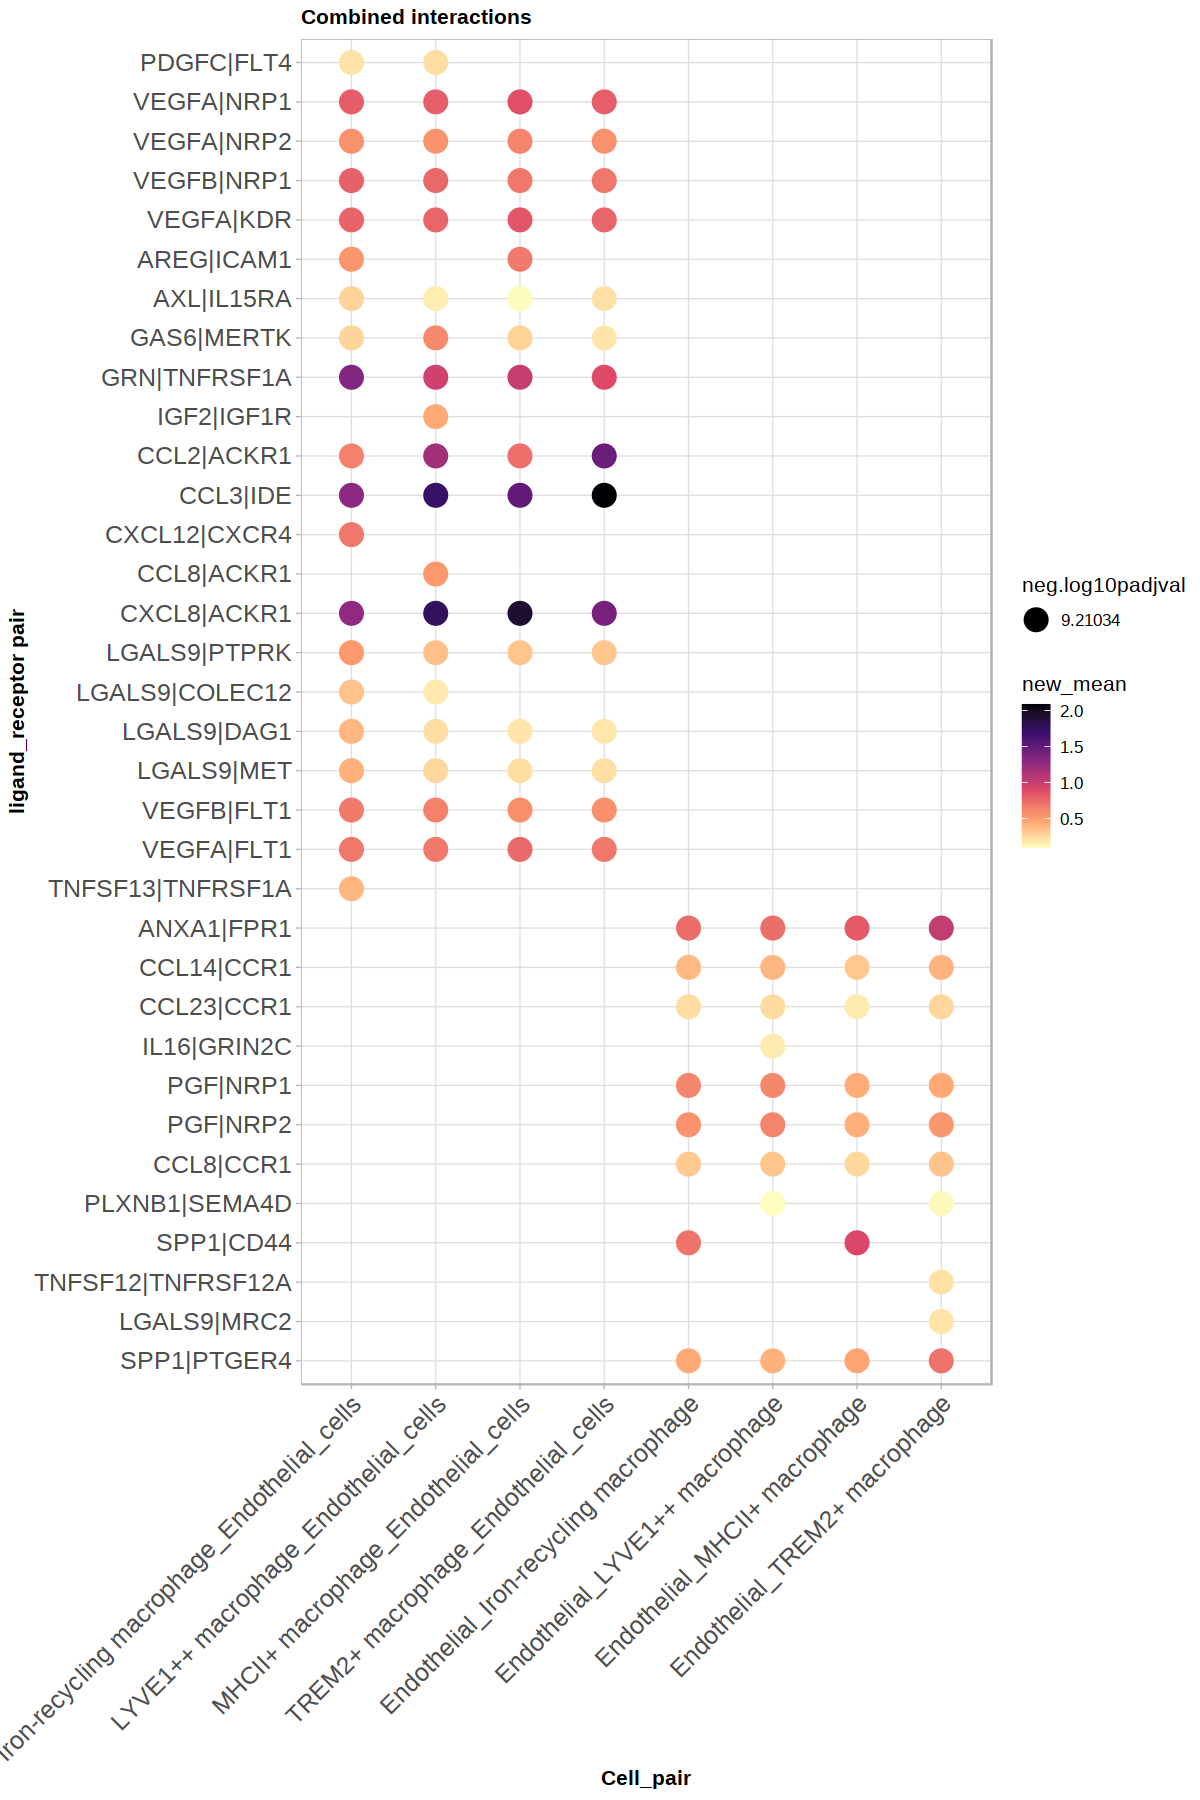

In [11]:
#generate combined plot
options(repr.plot.width =10, repr.plot.height = 15)
h +
#scale_x_discrete(limits = c('Myeloid_Endothelial_cells', 'Myeloid_Mural_cells', 'Lymphoid_Endothelial_cells', 'Lymphoid_Mural_cells'))+
scale_y_discrete(limits=rev)+
scale_fill_viridis_c(option = "magma", guide = "colourbar", aesthetics = "color", direction=-1)+ scale_size_area()+
theme_light(base_size=12)+
theme(axis.text.x = element_text(size = rel(1.5), angle=45, hjust=1, vjust=1),
     axis.text.y = element_text(size = rel(1.5)),
      plot.title = element_text(face='bold', size=rel(1)),
     axis.title.x = element_text(face='bold', size=rel(1)),
      axis.title.y = element_text(face='bold', size=rel(1)))+
xlab("Cell_pair") + ylab("ligand_receptor pair")+
ggtitle('Combined interactions')

## Separate plot by type of ligand: immune cells or endothelial cells

In [12]:
#define and order groups
cpdb_comb$Immune_broad <- factor(cpdb_comb$Immune_broad, levels=c('myeloid', 'lymphoid'))
cpdb_comb$Ligand <- factor(cpdb_comb$Ligand, levels=c('Ligand: Immune cells', 'Ligand: Endothelial cells'))

In [13]:
#order immune cells
cpdb_comb$Immune <- factor(cpdb_comb$Immune, levels=c('Iron-recycling macrophage', 'LYVE1++ macrophage', 'MHCII+ macrophage', 'TREM2+ macrophage'))

In [14]:
i <- ggplot(cpdb_comb, aes(x=cell_pair, y=gene_pair, size=neg.log10padjval, color=new_mean)) + 
  geom_point(stat = "identity")

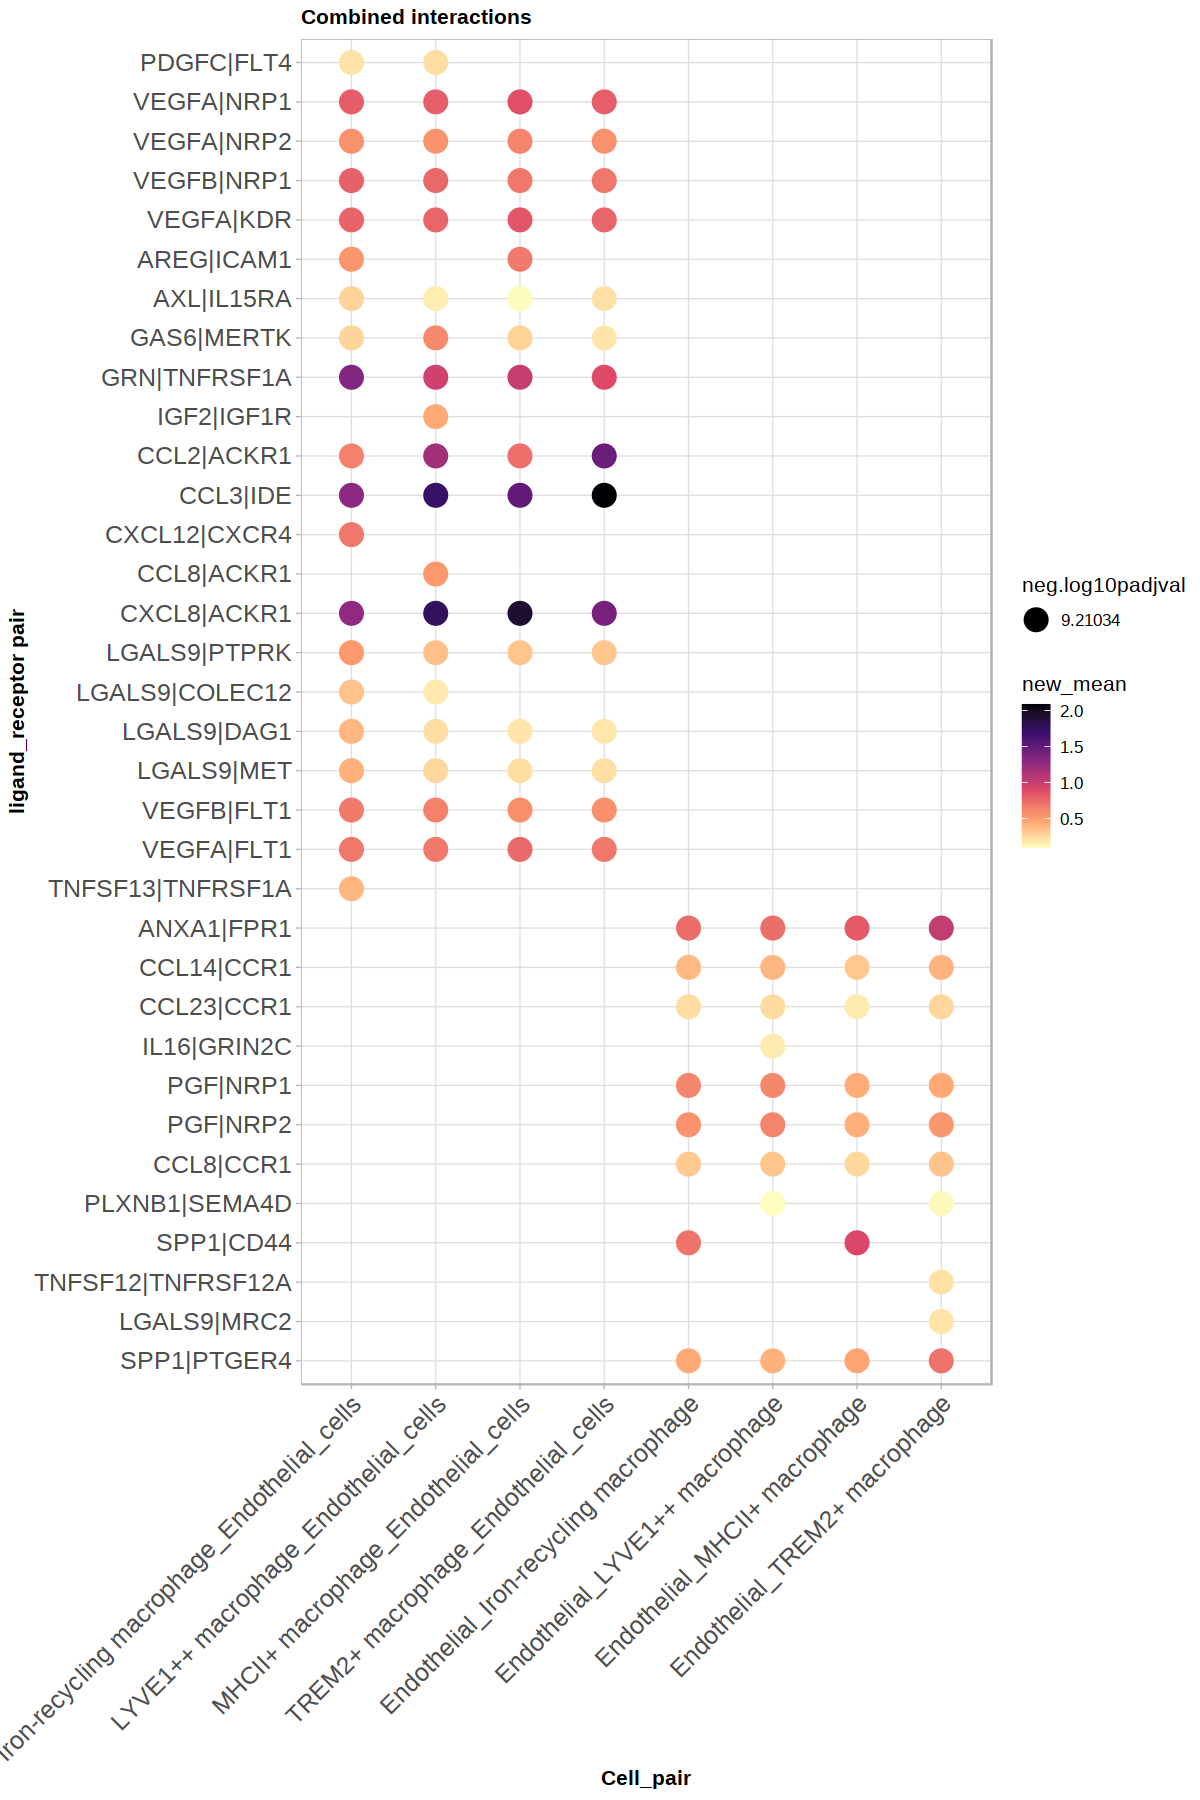

In [16]:
options(repr.plot.width =10, repr.plot.height = 15)
i +
scale_y_discrete(limits=rev)+
scale_fill_viridis_c(option = "magma", guide = "colourbar", aesthetics = "color", direction=-1)+ scale_size_area()+
theme_light(base_size=12)+
theme(axis.text.x = element_text(size = rel(1.5), angle=45, hjust=1, vjust=1),
     axis.text.y = element_text(size = rel(1.5)),
      plot.title = element_text(face='bold', size=rel(1)),
     axis.title.x = element_text(face='bold', size=rel(1)),
      axis.title.y = element_text(face='bold', size=rel(1)))+
xlab("Cell_pair") + ylab("ligand_receptor pair")+
ggtitle('Combined interactions')

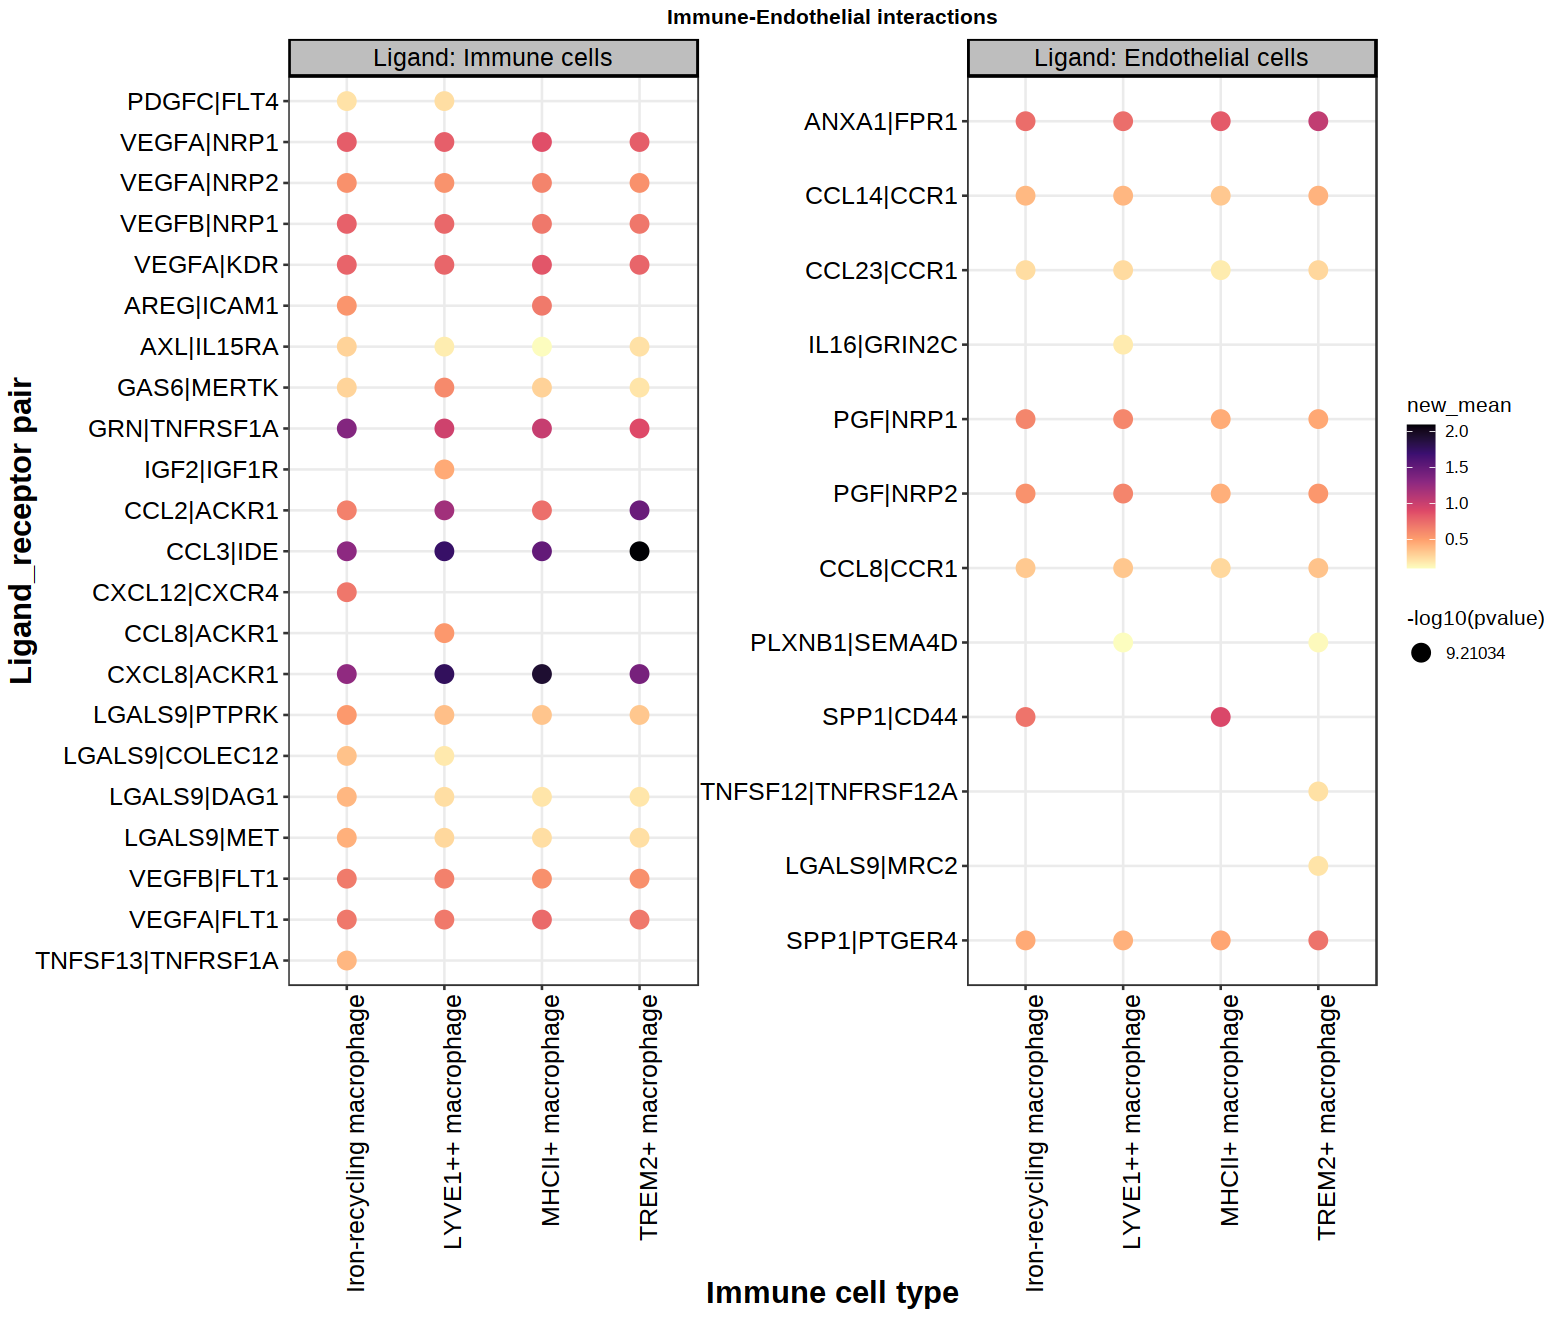

In [17]:
#seprate plots
options(repr.plot.width =13, repr.plot.height = 11)
i + 
scale_y_discrete(limits=rev)+
scale_fill_viridis_c(option = "magma", guide = "colourbar", aesthetics = "color", direction=-1)+
theme_bw(base_size=12)+
facet_wrap(~ Ligand, scales='free')+
theme(axis.text.x = element_text(size = rel(1.5), angle=90, hjust=1, vjust=1, color="black"),
     axis.text.y = element_text(size = rel(1.5), color="black"),
      plot.title = element_text(face='bold', size=rel(1), hjust = 0.5), 
     axis.title.x = element_text(face='bold', size=rel(1.5)),
      axis.title.y = element_text(face='bold', size=rel(1.5)),
     strip.text.x = element_text(size=rel(1.5), color="black"),
      strip.text.y = element_text(size=rel(1.5), color="black"),
      strip.background = element_rect(colour="black", fill="grey", size=1, linetype="solid"))+
scale_size_continuous(name='-log10(pvalue)', breaks=c(5,7,9))+
scale_x_discrete(breaks=c('Iron-recycling macrophage_Endothelial_cells', 'LYVE1++ macrophage_Endothelial_cells', 'MHCII+ macrophage_Endothelial_cells', 'TREM2+ macrophage_Endothelial_cells',
                          'Endothelial_Iron-recycling macrophage', 'Endothelial_LYVE1++ macrophage', 'Endothelial_MHCII+ macrophage', 'Endothelial_TREM2+ macrophage'),
        labels=c('Iron-recycling macrophage', 'LYVE1++ macrophage', 'MHCII+ macrophage', 'TREM2+ macrophage',
        'Iron-recycling macrophage', 'LYVE1++ macrophage', 'MHCII+ macrophage', 'TREM2+ macrophage'))+
xlab("Immune cell type") + ylab("Ligand_receptor pair")+
ggtitle('Immune-Endothelial interactions')

In [128]:
#ggsave('/home/jovyan/projects/skin/fetal_skin/figures/figures/angiogenesis_CPDB_combined_171022.pdf', width=13, height=11)